In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
covid=pd.read_csv('aggregate_covid_country.csv')

In [3]:
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [4]:
covid.shape

(23688, 5)

In [5]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (23688, 5)
Checking for null values:
 Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
Checking Data-type of each column:
 Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object


In [6]:
covid.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

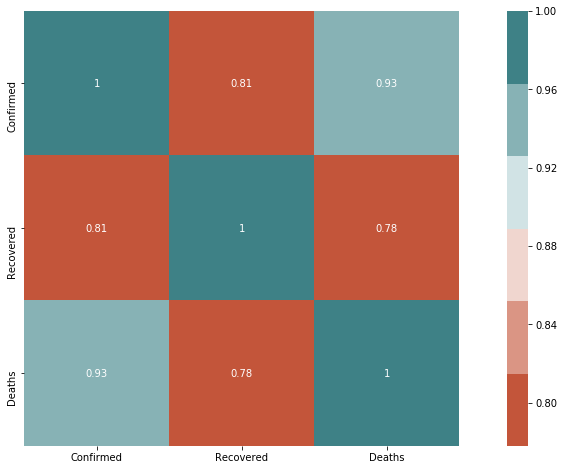

In [7]:
#Finding Correlation
plt.figure(figsize=(17,8))
sns.heatmap(covid.corr(),square=True,annot=True,cmap=sns.diverging_palette(20,200))
plt.show()

In [8]:
Y_variables = covid['Deaths']
print(Y_variables.shape)
X_variables = covid.drop(['Deaths','Country','Date'],axis=1)
print(X_variables.shape)

(23688,)
(23688, 2)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_variables, Y_variables, test_size=0.30, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)


In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [11]:
classifiers_ = [
    ("AdaBoost",AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1))
    ]

In [13]:
clf_names = []
train_scores = []
test_scores = []
for n,clf in classifiers_:
    clf_names.append(n)
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(n+" training done!")
    
    # Measure training accuracy and score
    train_scores.append(clf.score(X_train, y_train))
    print(n+" training score done!")
    
    # Measure test accuracy and score
    test_scores.append(clf.score(X_test, y_test))
    print(n+" testing score done!")
    print("---")

AdaBoost training done!
AdaBoost training score done!
AdaBoost testing score done!
---
Decision Tree training done!
Decision Tree training score done!
Decision Tree testing score done!
---
Random Forest training done!
Random Forest training score done!
Random Forest testing score done!
---


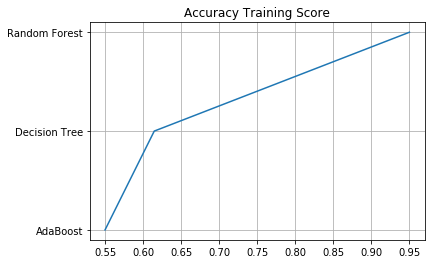

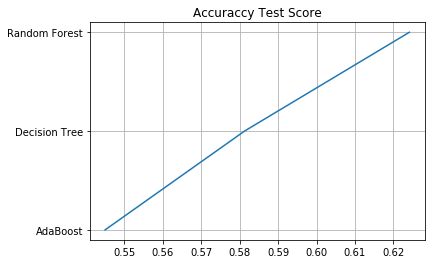

In [14]:
#Plot results
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_names)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_names)
plt.show()

Random Forest is clearly the winner here.

In [20]:
estimator = RandomForestRegressor()
param_grid = { "n_estimators" :[50,100,200] ,
               "max_features" : ["auto", "sqrt", "log2"] ,
               "bootstrap": [True, False] ,
               "min_samples_split" : [2,4,8]
             }
clf = GridSearchCV(estimator, param_grid, cv=5)
clf.fit(X_train,y_train)
print(f"best parameters: {clf.best_params_}")
print(f"best score: {clf.score(X_test,y_test)}")

best parameters: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 50}
best score: 0.9835368222880122


In [21]:
from sklearn.externals import joblib
joblib.dump(clf,'CovidModel.obj')

['CovidModel.obj']